[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_7.ipynb)

In [0]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def linear_lagrange(a,x):
    y = a[1]*(x - a[2])/(a[0] - a[2]) + a[3]*(x - a[0])/(a[2] - a[0])
    #plt.plot(x,y,color='blue',label='Linear Lagrange')
    #graph_details()
    return y

In [0]:
def zero_newton(a,x):
    return a[1]

def one_newton(a,x,f):
    y = zero_newton(a,x) + ((x-a[0])*(a[1]-a[3])/(a[0]-a[2]))
    if(f==1):
        plt.plot(x,y,color = 'blue',label='First Order Newton Divided Difference')
        plt.legend()
        plt.grid(True)
        plt.savefig('Graph_' + str(number) + '.png')
        files.download('Graph_' + str(number) + '.png')
        plt.show()
    return y

def func_one(x1,x2,y1,y2):
    return (y2 - y1) / (x2 - x1)

def two_newton(a,x,f):
    j = a[4] - a[0]
    i = func_one(a[2],a[4],a[3],a[5])
    k = func_one(a[0],a[2],a[1],a[3])
    j = (i - k) / j
    y = one_newton(a,x,0) + ((x-a[0])*(x-a[2])*j)
    if(f==1):
        plt.plot(x,y,color = 'blue',label='Second Order Newton Divided Difference')
        plt.legend()
        plt.grid(True)
        plt.savefig('Graph_' + str(number) + '.png')
        files.download('Graph_' + str(number) + '.png')
        plt.show()
    return y 

def func_two(x1,x2,x3,y1,y2,y3):
    a = func_one(x1,x2,y1,y2)
    b = func_one(x2,x3,y2,y3)
    return (b - a) / (x3 - x1)

def three_newton(a,x,f):
    j = a[6] - a[0]
    k = func_two(a[2],a[4],a[6],a[3],a[5],a[7]) - func_two(a[0],a[2],a[4],a[1],a[3],a[5])
    y = two_newton(a,x,0) + ((x-a[0])*(x-a[2])*(x-a[4])*k/j)
    if(f==1):
      plt.plot(x,y,color = 'blue',label='Third Order Newton Divided Difference')
      plt.legend()
      plt.grid(True)
      plt.savefig('Graph_' + str(number) + '.png')
      files.download('Graph_' + str(number) + '.png')
      plt.show()
    return y

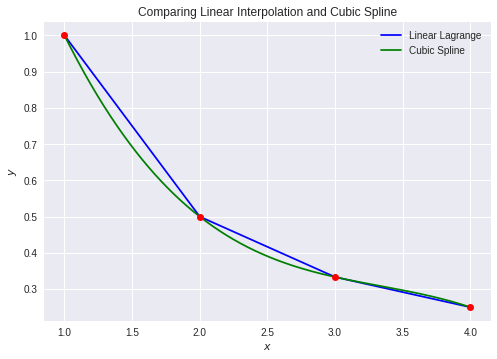

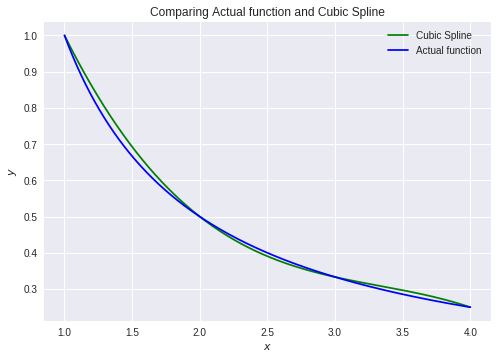

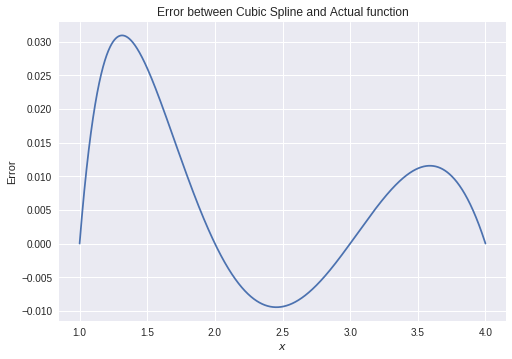

In [34]:
point1 = [1,1]
point2 = [2,1/2]
point3 = [3,1/3]
point4 = [4,1/4]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

plt.plot(x1,y1,color='blue',label='Linear Lagrange')
plt.plot(x2,y2,color='blue')
plt.plot(x3,y3,color='blue')

x = [1,2,3,4]
y = [1,1/2,1/3,1/4]

cs = CubicSpline(x,y)

t = np.arange(1,4,0.0001)
plt.plot(t,cs(t),color='green',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='red',marker='o')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()

plt.plot(t,cs(t),color='green',label='Cubic Spline')
plt.plot(t,1/t,color='blue',label='Actual function')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('Comparing Actual function and Cubic Spline')
plt.show()

plt.plot(t,cs(t) - 1/t)
plt.xlabel('$x$')
plt.ylabel('Error')
plt.grid(True)
plt.title('Error between Cubic Spline and Actual function')
plt.show()

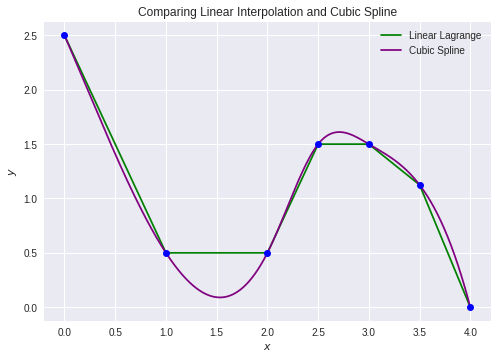

In [36]:
number = 5
point1 = [0 , 2.5]
point2 = [1 , 0.5]
point3 = [2 , 0.5]
point4 = [2.5 , 1.5]
point5 = [3 , 1.5]
point6 = [3.5 , 1.125]
point7 = [4 , 0]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

a = point4 + point5
x4 = np.arange(a[0],a[2],0.00001)
y4 = linear_lagrange(a,x4)

a = point5 + point6
x5 = np.arange(a[0],a[2],0.00001)
y5 = linear_lagrange(a,x5)

a = point6 + point7
x6 = np.arange(a[0],a[2],0.00001)
y6 = linear_lagrange(a,x6)

plt.plot(x1,y1,color='green',label='Linear Lagrange')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='green')
plt.plot(x4,y4,color='green')
plt.plot(x5,y5,color='green')
plt.plot(x6,y6,color='green')

x = [0,1,2,2.5,3,3.5,4]
y = [2.5,0.5,0.5,1.5,1.5,1.125,0]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()

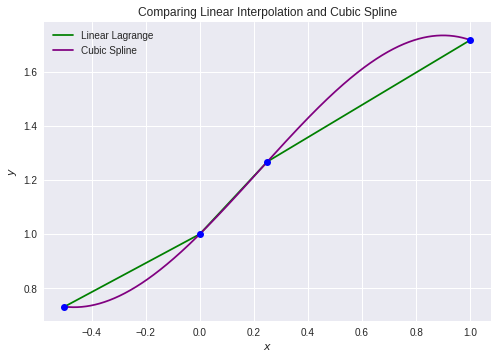

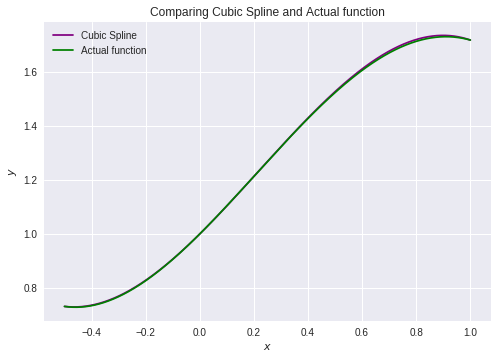

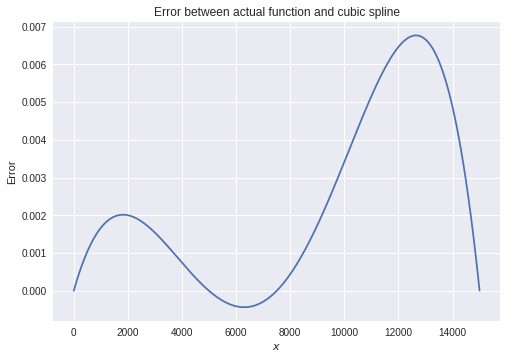

In [37]:
point1 = [-0.5 , 0.731531]
point2 = [0 , 1.0]
point3 = [0.25 , 1.268400]
point4 = [1 , 1.718282]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

plt.plot(x1,y1,color='green',label='Linear Lagrange')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='green')

x = [-0.5, 0 , 0.25 ,1]
y = [0.731531 ,1.0, 1.268400 , 1.718282]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()

plt.plot(t,cs(t),color='purple',label='Cubic Spline')
plt.plot(t,np.exp(t) - t**3,color='green',label='Actual function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Cubic Spline and Actual function')
plt.show()

plt.plot(cs(t) - np.exp(t) + t**3)
plt.xlabel('$x$')
plt.ylabel('Error')
plt.title('Error between actual function and cubic spline')
plt.show()

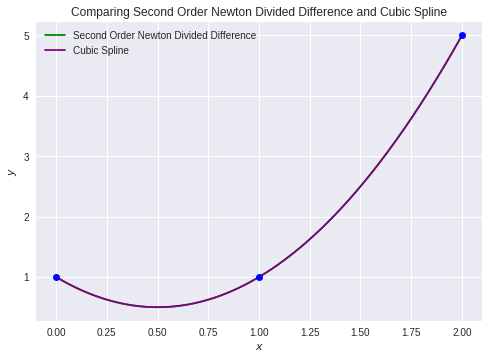

In [47]:
point1 = [0, 1]
point2 = [1, 1]
point3 = [2, 5]

a = point1 + point2 + point3
x = np.arange(a[0],a[4],0.0001)
y = two_newton(a,x,0)

plt.plot(x,y,color='green',label='Second Order Newton Divided Difference')
plt.xlabel('$x$')
plt.ylabel('$y$')
# plt.show()

# a = point1 + point2
# x1 = np.arange(a[0],a[2],0.0001)
# y1 = linear_lagrange(a,x1)

# a = point2 + point3
# x2 = np.arange(a[0],a[2],0.0001)
# y2 = linear_lagrange(a,x2)

# plt.plot(x1,y1,color='green',label='Linear Lagrange')
# plt.plot(x2,y2,color='green')

x = [0, 1, 2]
y = [1, 1, 5]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')
  
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Comparing Second Order Newton Divided Difference and Cubic Spline')
plt.grid(True)
plt.show()

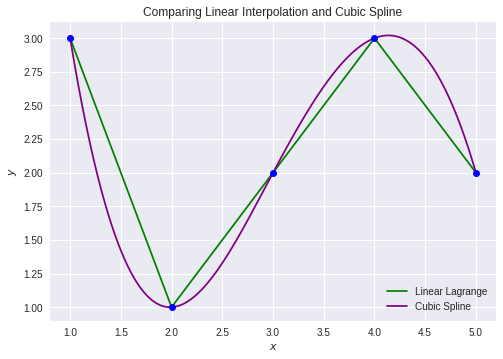

In [48]:
point1 = [1 , 3]
point2 = [2 , 1]
point3 = [3 , 2]
point4 = [4 , 3]
point5 = [5 , 2]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

a = point4 + point5
x4 = np.arange(a[0],a[2],0.00001)
y4 = linear_lagrange(a,x4)

plt.plot(x1,y1,color='green',label='Linear Lagrange')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='green')
plt.plot(x4,y4,color='green')

x = [1,2,3,4,5]
y = [3,1,2,3,2]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()

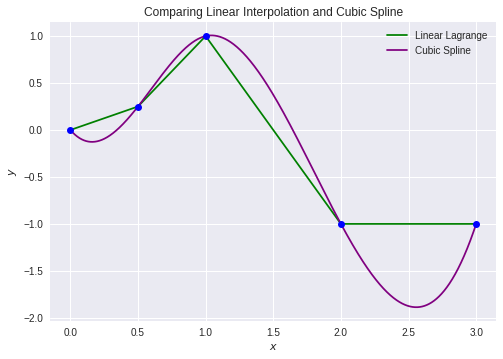

In [49]:
point1 = [0 , 0]
point2 = [1/2 , 1/4]
point3 = [1 , 1]
point4 = [2 , -1]
point5 = [3 , -1]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

a = point4 + point5
x4 = np.arange(a[0],a[2],0.00001)
y4 = linear_lagrange(a,x4)

plt.plot(x1,y1,color='green',label='Linear Lagrange')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='green')
plt.plot(x4,y4,color='green')

x = [0,1/2,1,2,3]
y = [0,1/4,1,-1,-1]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()

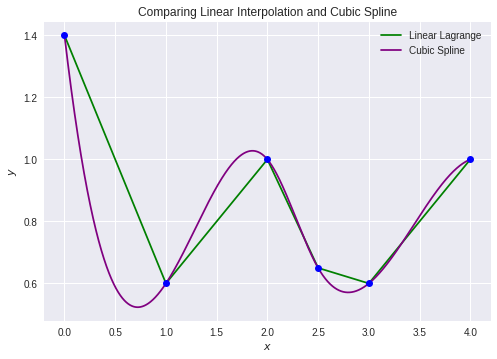

In [50]:
point1 = [0 , 1.4]
point2 = [1 , 0.6]
point3 = [2 , 1]
point4 = [2.5 , 0.65]
point5 = [3 , 0.6]
point6 = [4 , 1]

a = point1 + point2
x1 = np.arange(a[0],a[2],0.00001)
y1 = linear_lagrange(a,x1)

a = point2 + point3
x2 = np.arange(a[0],a[2],0.00001)
y2 = linear_lagrange(a,x2)

a = point3 + point4
x3 = np.arange(a[0],a[2],0.00001)
y3 = linear_lagrange(a,x3)

a = point4 + point5
x4 = np.arange(a[0],a[2],0.00001)
y4 = linear_lagrange(a,x4)

a = point5 + point6
x5 = np.arange(a[0],a[2],0.00001)
y5 = linear_lagrange(a,x5)

a = point6 + point7
x6 = np.arange(a[0],a[2],0.00001)
y6 = linear_lagrange(a,x6)

plt.plot(x1,y1,color='green',label='Linear Lagrange')
plt.plot(x2,y2,color='green')
plt.plot(x3,y3,color='green')
plt.plot(x4,y4,color='green')
plt.plot(x5,y5,color='green')
plt.plot(x6,y6,color='green')

x = [0,1,2,2.5,3,4]
y = [1.4,0.6,1,0.65,0.6,1]
cs = CubicSpline(x,y)

t = np.arange(x[0],x[len(x)-1],0.0001)
plt.plot(t,cs(t),color='purple',label='Cubic Spline')

for i in range(len(x)):
  plt.plot(x[i],y[i],color='blue',marker='o')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend()
plt.title('Comparing Linear Interpolation and Cubic Spline')
plt.show()